### 1.Problem Statement

In this assignment students have to find the frequency of words in a webpage. 
User can use urllib and BeautifulSoup to extract text from webpage.


In [3]:
#importing libraries
from bs4 import BeautifulSoup 
import urllib.request
import nltk
import matplotlib.pyplot as plt
import nltk
import pandas as pd


response = urllib.request.urlopen('http://php.net/') 
html = response.read()
soup = BeautifulSoup(html,"html5lib")

In [4]:
soup

<!DOCTYPE html>
<html lang="en" xmlns="http://www.w3.org/1999/xhtml"><head>

  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>

  <title>PHP: Hypertext Preprocessor</title>

 <link href="https://www.php.net/favicon.ico" rel="shortcut icon"/>
 <link href="http://php.net/phpnetimprovedsearch.src" rel="search" title="Add PHP.net search" type="application/opensearchdescription+xml"/>
 <link href="https://www.php.net/releases/feed.php" rel="alternate" title="PHP Release feed" type="application/atom+xml"/>
 <link href="https://www.php.net/feed.atom" rel="alternate" title="PHP: Hypertext Preprocessor" type="application/atom+xml"/>

 <link href="https://www.php.net/index.php" rel="canonical"/>
 <link href="https://www.php.net/index" rel="shorturl"/>
 <link href="https://www.php.net/index" hreflang="x-default" rel="alternate"/>



<link href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" media="screen" rel="stylesheet" type="text/css"/>
<

In [42]:
# #from the web page right click and inspect(content of the page [in div class newscontent (elabrate)
#-article-article class-newsentry] )iterating to get the text extracted
#parsing the webpage for the required text
text=[]
for i in soup.findAll('article',{'class':"newsentry"}): 
    text.append(i.text)

#   OR
# text = soup.get_text()

In [43]:
text

['\n  \n    07 Jan 2021\n    \n      PHP 8.0.1 Released!\n    \n  \n  \n    The PHP development team announces the immediate availability of PHP 8.0.1. This is a bug fix release.\n\nAll PHP 8.0 users are encouraged to upgrade to this version.\n\nFor source downloads of PHP 8.0.1 please visit our downloads page,\nWindows source and binaries can be found on windows.php.net/download/.\nThe list of changes is recorded in the ChangeLog.\n    \n  \n  \n',
 '\n  \n    07 Jan 2021\n    \n      PHP 7.3.26 Released!\n    \n  \n  \n    The PHP development team announces the immediate availability of PHP 7.3.26. This is a security release.\n\nAll PHP 7.3 users are encouraged to upgrade to this version.\n\nFor source downloads of PHP 7.3.26 please visit our downloads page,\nWindows source and binaries can be found on windows.php.net/download/.\nThe list of changes is recorded in the ChangeLog.\n    \n  \n  \n',
 '\n  \n    07 Jan 2021\n    \n      PHP 7.4.14 Released!\n    \n  \n  \n    The PHP dev

In [44]:
#Text cleaning
import re

text_cleaned=[]
for string in text:
    
    str1=" ".join(string.split()) 
    #str2 = str.replace('\n'," ")
#     str3=re.sub(r'\s',' ',str1)   #\s is to remove white space
    str2=re.sub(r'[^a-zA-Z\s]',' ',str1) #^a-zA-Z\s - removes everything expect letters mentioned after ^
    str3=str2.split()
# "^": This expression matches the start of a string
# "w+": This expression matches the alphanumeric character in the string

# text_cleaned = re.findall('\w+', text)

 
    for i in str3:
        text_cleaned.append(i)        

In [45]:
len(text_cleaned)

2553

In [46]:
text_cleaned

['Jan',
 'PHP',
 'Released',
 'The',
 'PHP',
 'development',
 'team',
 'announces',
 'the',
 'immediate',
 'availability',
 'of',
 'PHP',
 'This',
 'is',
 'a',
 'bug',
 'fix',
 'release',
 'All',
 'PHP',
 'users',
 'are',
 'encouraged',
 'to',
 'upgrade',
 'to',
 'this',
 'version',
 'For',
 'source',
 'downloads',
 'of',
 'PHP',
 'please',
 'visit',
 'our',
 'downloads',
 'page',
 'Windows',
 'source',
 'and',
 'binaries',
 'can',
 'be',
 'found',
 'on',
 'windows',
 'php',
 'net',
 'download',
 'The',
 'list',
 'of',
 'changes',
 'is',
 'recorded',
 'in',
 'the',
 'ChangeLog',
 'Jan',
 'PHP',
 'Released',
 'The',
 'PHP',
 'development',
 'team',
 'announces',
 'the',
 'immediate',
 'availability',
 'of',
 'PHP',
 'This',
 'is',
 'a',
 'security',
 'release',
 'All',
 'PHP',
 'users',
 'are',
 'encouraged',
 'to',
 'upgrade',
 'to',
 'this',
 'version',
 'For',
 'source',
 'downloads',
 'of',
 'PHP',
 'please',
 'visit',
 'our',
 'downloads',
 'page',
 'Windows',
 'source',
 'and',
 '

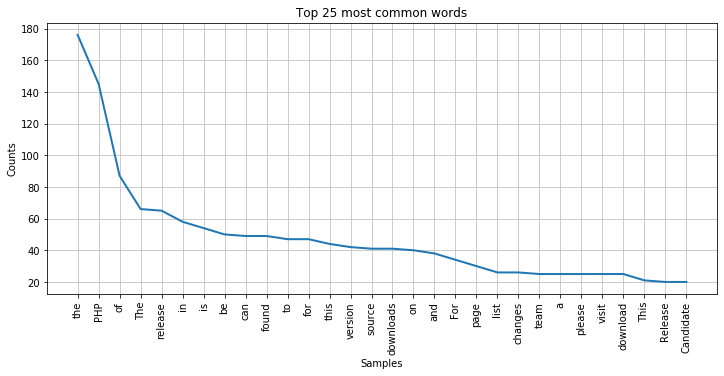

In [55]:
#Plotting the top 25 most frequent words
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
# plt.xticks(fontsize=13,rotation=90)
fre_dist=nltk.FreqDist(text_cleaned)   #A frequency distribution for the outcomes of an experiment.
fre_dist.plot(30,cumulative=False)


In [66]:
#creating a dataframe with the frequency of all words
df_frequency=pd.DataFrame([fre_dist]).transpose()
df_frequency.rename(columns={0:'Frequency'},inplace=True)
df_frequency.sort_values(by='Frequency',ascending=False).head()

,Frequency
the,176
PHP,145
of,87
The,66
release,65
